# Abalone Case Study

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [66]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Input variables: Name / Data Type / Measurement Unit / Description
Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Output variable(lable variable): Predict the rings of each abalone which will lead us to the age of that abalone

# EDA 

In [67]:
df.shape

(4177, 9)

In [68]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.keys()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [70]:
df["age"] = df["Rings"] + 1.5
#df.drop("Rings",axis = 1, inplace = True)

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [73]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [8]:
#it shows it is non null data with label is of integer type

In [75]:
df.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False,False


In [76]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
age               0
dtype: int64

In [77]:
#there are no null values in this data set

<AxesSubplot:>

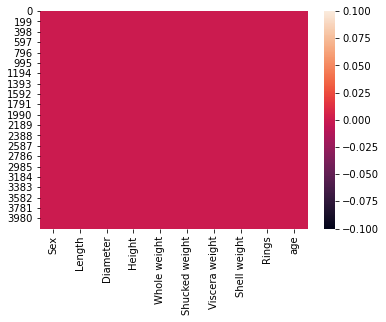

In [78]:
sns.heatmap(df.isnull())

In [79]:
#observation from the heatmap shows no null values

# Summary Statistics

In [80]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


Key Obsevations: mean is more than the median (25 th percentile) in all the columns Data is not much scattered (Lenght, shell weight) There is a small difference in 75th percentile & other input values. Mean is higher than median (50th percentile) in whole weight, shucked weight,Viscera weight, Shell weight which means data has skewness.

data description: 
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

In [94]:
df.age.unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [95]:
#these are different age(s) of the abalone

In [101]:
list(atributes_sex.iloc[0])

[0.5790933435348128,
 0.4547322111706197,
 0.15801071155317528,
 1.046532134659526,
 0.44618783473603674,
 0.23068859984697754,
 0.30200994644223456]

In [102]:
atributes_sex.columns.values

array(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'], dtype=object)

In [103]:
atributes_sex

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Sex,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969


# Making DataFrame for the Nominal Data

In [104]:
df_visualization_nominal=df[['Sex']].copy()

In [105]:
df_visualization_nominal.columns

Index(['Sex'], dtype='object')

# Visualization of the Data:
For the nomial categorical data we will use countplot as it will give the frequency of the classes of the columns:

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


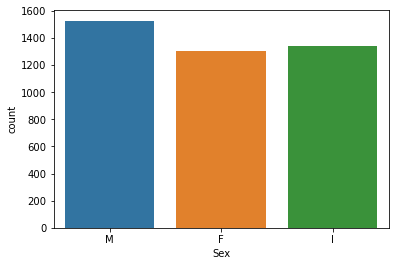

In [106]:
ax = sns.countplot(x="Sex", data=df_visualization_nominal)
print(df_visualization_nominal["Sex"].value_counts())


From the above observations the total number of male is 1528 and total number of female is 1307 and Infant is 1342.

In [107]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
age               float64
dtype: object

# Making dataframe of the ordinal data.

In [108]:
df_visualization_ordinal=df[['age']].copy()


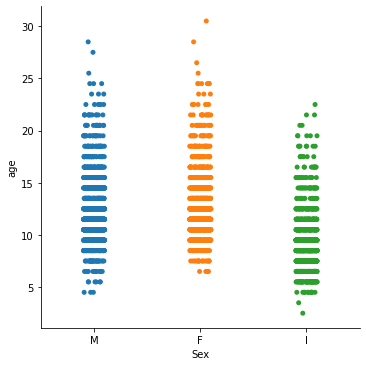

In [109]:
sns.catplot(x='Sex', y='age', data=df)

# Checking the distribution of the continuous value of the float type columns.

In [110]:
df_visualization_continuous=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight']].copy()


<AxesSubplot:xlabel='Length', ylabel='Density'>

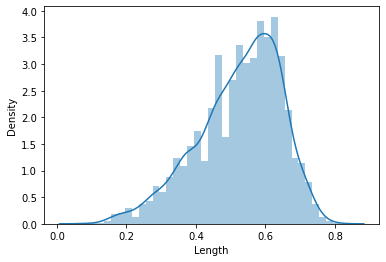

In [111]:
sns.distplot(df_visualization_continuous['Length'], kde=True)


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

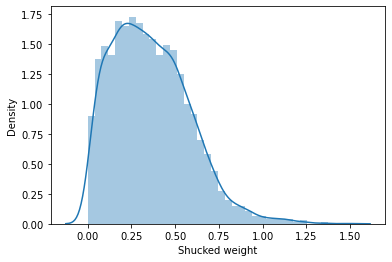

In [112]:
sns.distplot(df_visualization_continuous['Shucked weight'], kde=True)


<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

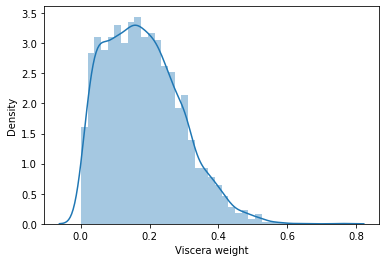

In [113]:
sns.distplot(df_visualization_continuous['Viscera weight'], kde=True)


Visualization part is completed.

Since the dataset has 1 (Sex) string column. We will use the encoding techniques to convert the string data to numerical one


# Encoding of DataFrame:

In [114]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [115]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [116]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [117]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
age               float64
dtype: object

# Describe the dataset:

In [118]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


<AxesSubplot:>

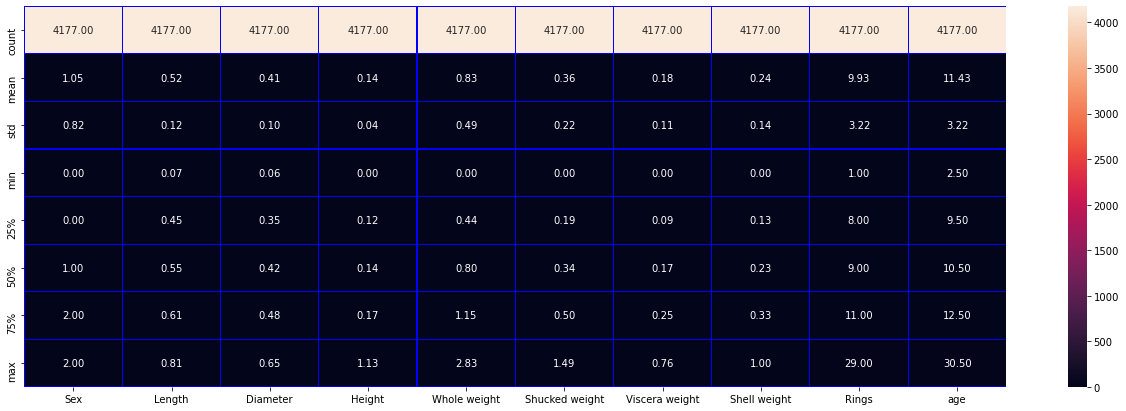

In [119]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="blue",fmt="0.2f")

# Correlation of the columns with the target columns

In [120]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


<AxesSubplot:>

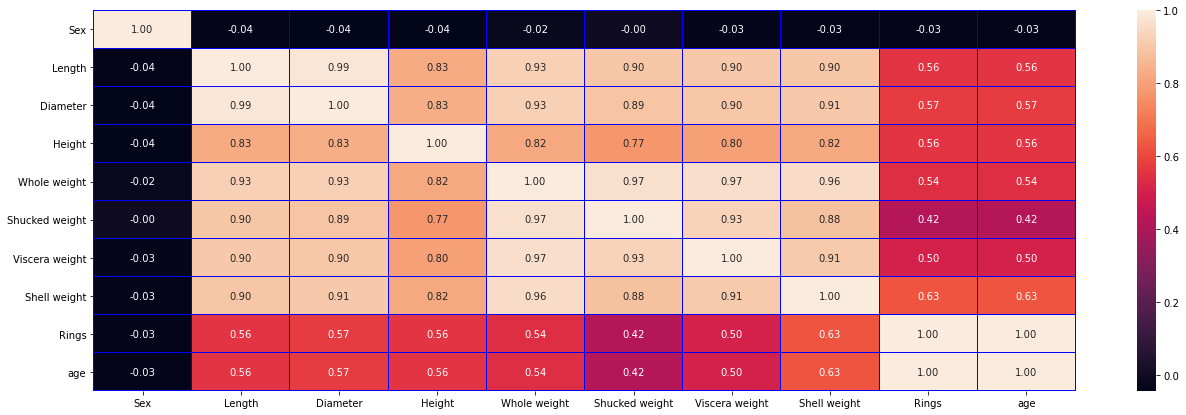

In [121]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="blue",fmt="0.2f")

Checking the columns which are positively and negative correlated with the target columns:
    
    'sex' highly negative impact on target 'age'
    whereas others col positively impact 'age'

In [122]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
age               1.114102
dtype: float64

Keeping +/-0.5 as the range for skewness, here are the columns which does not lie within this range.

In this case we shall treat traget 'age' showing skewness is a continuous data, while other shows skewness is a float and string data

<AxesSubplot:xlabel='age', ylabel='Density'>

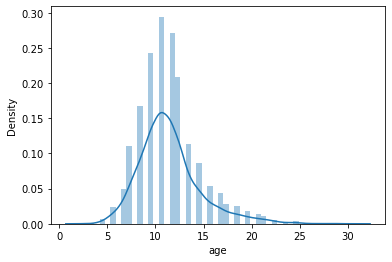

In [123]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

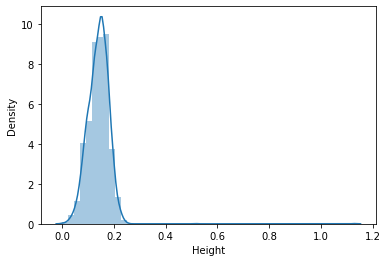

In [124]:
sns.distplot(df['Height'])

highly skewed

# Outliers Check:

In [125]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
age               float64
dtype: object

Checking the outliers on the int and float type of columns.

<AxesSubplot:>

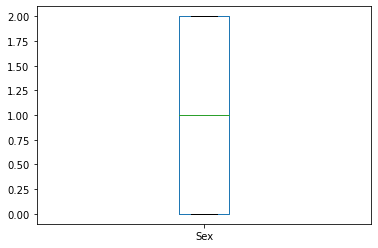

In [126]:
df['Sex'].plot.box()

Sex                  AxesSubplot(0.125,0.536818;0.133621x0.343182)
Length            AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Diameter           AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Height            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Whole weight      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.133621x0.343182)
Viscera weight       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Shell weight          AxesSubplot(0.44569,0.125;0.133621x0.343182)
Rings                AxesSubplot(0.606034,0.125;0.133621x0.343182)
age                  AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

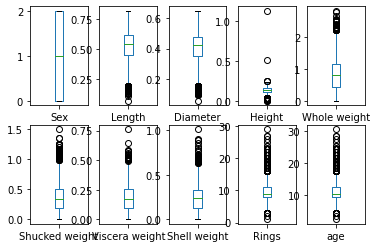

In [128]:
df.plot(kind='box',subplots=True,layout=(2,5))

# Considering the outlier removal

In [129]:
df.shape

(4177, 10)

In [130]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
         165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
         232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
         270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
         313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
         362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
         433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
         526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
         675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
         744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
        1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
        1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422,
        1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756, 1757,
        1759, 1761, 1762, 1762, 1762, 

In [131]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [132]:
df_new_z.shape

(4027, 10)

In [133]:
df=df_new_z

In [134]:
df.shape

(4027, 10)

# Percentage loss of data:


In [135]:
Data_loss=((4177-4027)/4177)*100

In [136]:
Data_loss


3.5910940866650707

# Separating the columns into features and target:

In [137]:
x=df.drop("age",axis=1)
y=df["age"]

# Scaling the data using Min-Max Scaler:

In [138]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [139]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)


In [140]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [141]:
pred_test=lr.predict(xtest)

In [142]:
print(r2_score(ytest,pred_test))

1.0


# Regularization:

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [144]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [145]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
lss

0.9999999998505198

In [146]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999999998208813

# Ensemble technique:

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [148]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_decision = rf.predict(xtest)

rfs = r2_score(ytest,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 100.0
Cross Val Score: 99.99999710308867


We are getting model accuracy and cross validation both as nearly 100% which shows our model is performing extremely well

In [150]:
df["age"].value_counts()


10.5    686
11.5    625
9.5     566
12.5    472
8.5     391
7.5     258
13.5    251
14.5    199
15.5    119
6.5     113
16.5    102
17.5     62
18.5     53
5.5      49
19.5     39
20.5     32
4.5      10
Name: age, dtype: int64

In [154]:
df_1 = df.copy()
Age = []
for i in df_1["age"]:
    if i < 9.33:
        Age.append("1")
    if i > 9.33 and i< 18.66 :
        Age.append("2")
    if i > 18.66:
        Age.append("3")
df_1["Age"] = Age
df_1.drop("age" , axis =1,inplace=True)
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


# saving the model

In [155]:
import pickle
filename = 'abalone.pkl'
pickle.dump(rf, open(filename, 'wb'))

# Conclusion:

In [156]:
loaded_model = pickle.load(open('abalone.pkl', 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

1.0


In [157]:
conclusion=pd.DataFrame([loaded_model.predict(xtest)[:],pred_decision[:]],index=["Predicted","Orginal"])


In [158]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
Predicted,14.5,14.5,14.5,19.5,7.5,8.5,12.5,8.5,17.5,10.5,...,10.5,18.5,13.5,11.5,10.5,10.5,10.5,12.5,11.5,10.5
Orginal,14.5,14.5,14.5,19.5,7.5,8.5,12.5,8.5,17.5,10.5,...,10.5,18.5,13.5,11.5,10.5,10.5,10.5,12.5,11.5,10.5


It shows highly accurate model